In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image  

In [2]:
df=pd.read_csv('/home/sarra/Documents/projetGLSI1/prediction/dataBC.csv')

In [3]:
df.loc[(df.diagnosis =="M"), 'diagnosis'] = 1
df.loc[(df.diagnosis =="B"), 'diagnosis'] = 0

In [4]:
feature_cols = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean']
X=df[feature_cols]
Y=df.diagnosis
Y=Y.astype('int')

In [5]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=30,random_state=1)

In [6]:
clf=DecisionTreeClassifier(criterion="entropy", max_depth=8)
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))


Accuracy: 0.9


In [7]:
forest_clf=RandomForestClassifier(n_estimators=12,criterion="entropy", max_depth=8)
forest_clf.fit(X_train,Y_train)
y_pred2=forest_clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred2))


Accuracy: 0.9666666666666667


In [8]:
import pickle
pickle.dump(forest_clf,open('finalMode.pkl','wb'))

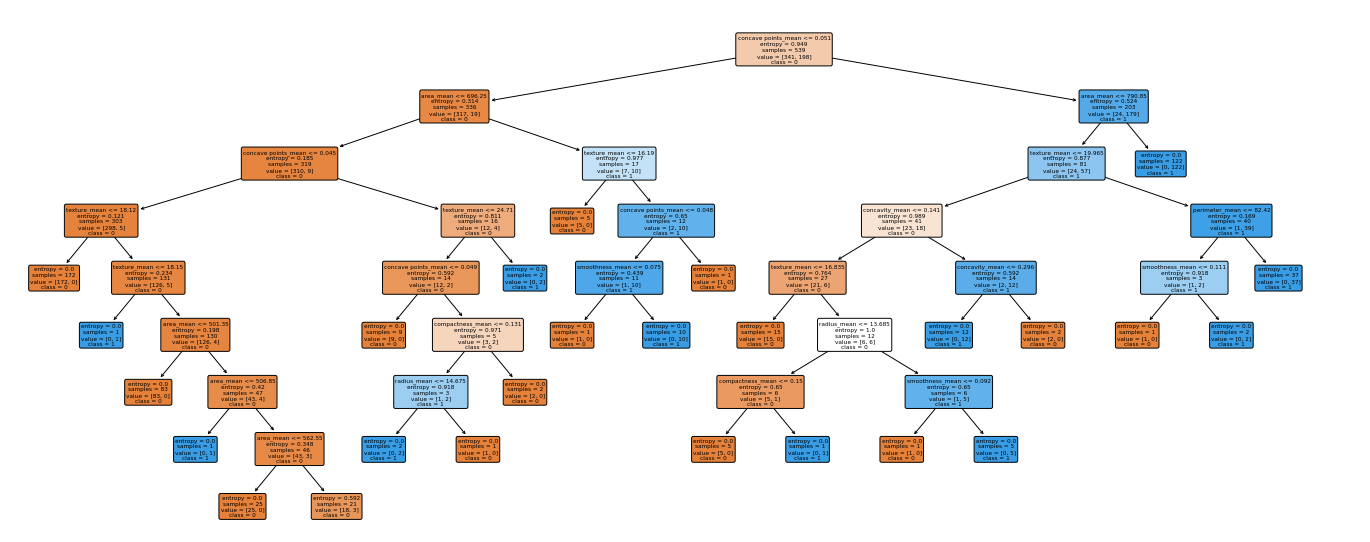

In [9]:
from sklearn import tree as tr
fig, axes = plt.subplots(figsize = (25,10), dpi=70)
tr.plot_tree(clf, filled = True,rounded=True,feature_names = feature_cols,class_names=['0','1']);

In [10]:
df[['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean']].head(50)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
0,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100
1,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170
2,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900
3,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200
4,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300
5,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.080890
6,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.074000
7,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.059850
8,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.093530
9,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.085430


In [11]:
print(clf.predict(np.array([[8.196,	16.84	,51.71,	201.9,	0.08600	,0.05943,	0.01588	,0.005917]])))

[0]


/home/sarra/.local/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [12]:

fig, axes = plt.subplots(nrows = 4,ncols = 3,figsize = (200,150))
estim=1
for index in range(0, 4):
    for row in range(0,3):
        tr.plot_tree(forest_clf.estimators_[index],
                    feature_names = feature_cols, 
                    class_names=['0','1'],
                    filled = True,
                    ax = axes[index][row]);
        axes[index][row].set_title('Estimator: ' + str(estim), fontsize = 100)
        estim+=1
